In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import sys
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.utils import  check_array


In [3]:
df=pd.read_csv("/home/gsmodi/Music/OneDrive_1_29-02-2020/Datasets/Question-4/weather.csv")
df=df.drop(columns=['Formatted Date','Daily Summary'])

In [4]:
df.describe()
df.head()
df.nunique()

Summary                       26
Precip Type                    2
Temperature (C)             7338
Apparent Temperature (C)    8745
Humidity                      90
Wind Speed (km/h)           2424
Wind Bearing (degrees)       360
Visibility (km)              930
Pressure (millibars)        4843
dtype: int64

In [5]:
df.dtypes
df.isna().sum()
df = df.dropna()
df.isna().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [6]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Summary','Precip Type']]).toarray())

In [7]:
df1=df.drop(columns=['Summary','Precip Type'])
corr_matrix = df.corr()
#df = df1.join(enc_df)

In [8]:
#df.head()

In [9]:
enc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
X=df1.drop(df1.columns[1],axis=1)
Y=df1.iloc[:,1]
X = (X - X.mean())/X.std()
X = X.join(enc_df)
X = X.join(Y)
X.isna().sum()
X = X.dropna()
Y = X.iloc[:,-1]
X = X.iloc[:,:-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
X_train.shape

(61181, 34)

In [11]:
X_train = pd.concat([X_train,Y_train],axis=1)
ones = np.ones([X_train.shape[0],1])
Y_train = X_train.iloc[:,34:35].values
print(Y_train)
X_train = X_train.iloc[:,0:34]
X_train = np.concatenate((ones,X_train),axis=1)

[[28.17222222]
 [10.98888889]
 [15.55555556]
 ...
 [13.66666667]
 [25.92777778]
 [ 3.65555556]]


In [12]:
#learning_rate = 0.1
#iterations = 10000
# theta = np.zeros(8) # 7 is the number of features
#theta = np.zeros([1,35])

In [40]:
def gradient_decent(X_train,Y_train,theta,learning_rate,iterations):
    
    for i in range(iterations):
        theta = theta - (learning_rate/len(X_train)) * np.sum(X_train * (X_train @ theta.T - Y_train), axis=0)
    
    return theta

In [14]:
#g = gradient_decent(X_train,Y_train,theta,learning_rate,iterations)
#g = g[0]

In [41]:
def pred(learning_rate,iterations,theta):
    g = gradient_decent(X_train,Y_train,theta,learning_rate,iterations)
    g = g[0]
    y_pred = []
    for index,rows in X_test.iterrows():
        y = 0
        rows = list(rows)
        for i in range(len(rows)):
            y = y + rows[i]*g[i+1]
        y = y + g[0]
        y_pred.append(y)
    return y_pred

In [42]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100  

In [43]:
print(r2_score(Y_test,y_pred))
print(mean_absolute_error(Y_test,y_pred))
print(mean_squared_error(Y_test, y_pred))
print(mean_absolute_percentage_error(Y_test,y_pred))


0.9899487119356423
0.8454385984115623
1.1519684505455599
53.8664761407084


In [44]:
len(X_train[0])

35

(1, 35)


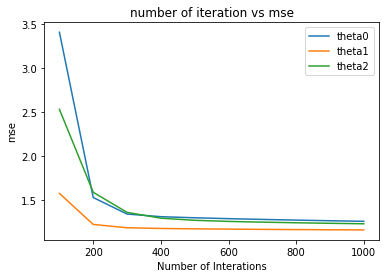

In [46]:


weights = [[np.random.uniform(-10,0, len(X_train[0]))], [np.random.uniform(0,1, len(X_train[0]))], [np.random.uniform(1,10, len(X_train[0]))]]


theta0=np.array(weights[0])  #Negative
theta1=np.array(weights[1])  #less than 1
theta2=np.array(weights[2])  #positive
print(theta0.shape)
x_axis = [100*i for i in range(1,11)]
er0=[]
er1=[]
er2=[]
learning_rate =0.1
#iterations = 1000

for i in x_axis:
    pe=pred(learning_rate,i,theta0)
    er0.append(mean_squared_error(Y_test,pe))
for i in x_axis:
    pe=pred(learning_rate,i,theta1)
    er1.append(mean_squared_error(Y_test,pe))
for i in x_axis:
    pe=pred(learning_rate,i,theta2)
    er2.append(mean_squared_error(Y_test,pe))
fig,ax = plt.subplots()
ax.plot(x_axis,er0,label='theta0')
ax.plot(x_axis,er1,label='theta1')
ax.plot(x_axis,er2,label='theta2') 
ax.legend()
ax.set_xlabel("Number of Interations")
ax.set_ylabel("mse")
ax.set_title("number of iteration vs mse")
plt.show()

In [32]:
theta = np.zeros([1,35])
theta.shape

(1, 35)